[*********************100%%**********************]  1 of 1 completed


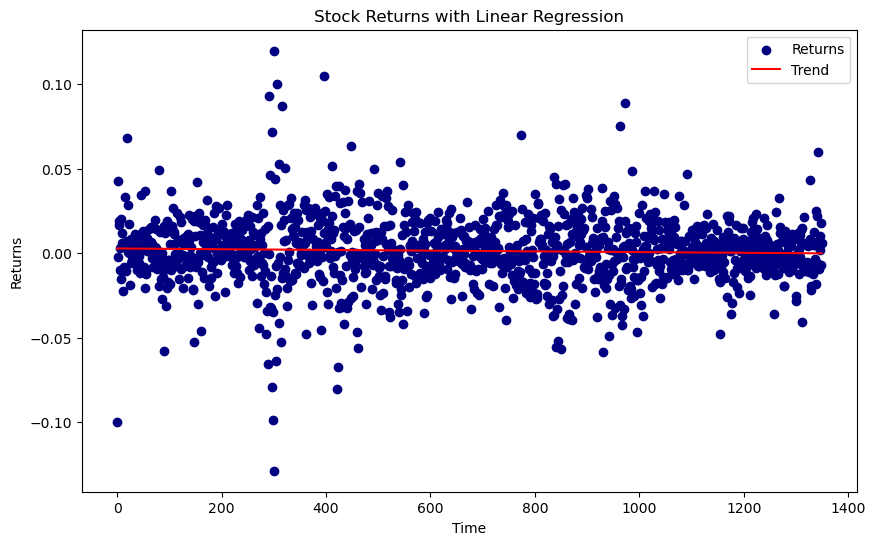

Stock: AAPL
Regression Slope: -2.1203972813672047e-06
Regression Intercept: 0.002816441313805473


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Define function to retrieve stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Define function to calculate returns
def calculate_returns(prices):
    returns = prices.pct_change().dropna()
    return returns

# Define function to perform linear regression
def perform_regression(returns):
    X = np.arange(len(returns)).reshape(-1, 1)
    y = returns.values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0][0], model.intercept_[0]

# Define main function
def main():
    # Parameters
    ticker = 'AAPL'
    start_date = '2019-01-01'
    end_date = datetime.today().strftime('%Y-%m-%d')

    # Retrieve stock data
    stock_prices = get_stock_data(ticker, start_date, end_date)

    # Calculate returns
    returns = calculate_returns(stock_prices)

    # Perform linear regression
    slope, intercept = perform_regression(returns)

    # Plot data and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(np.arange(len(returns)), returns, color='navy', label='Returns')
    plt.plot(np.arange(len(returns)), slope * np.arange(len(returns)) + intercept, color='red', label='Trend')
    plt.title('Stock Returns with Linear Regression')
    plt.xlabel('Time')
    plt.ylabel('Returns')
    plt.legend()
    plt.show()

    print(f'Stock: {ticker}')
    print(f'Regression Slope: {slope}')
    print(f'Regression Intercept: {intercept}')

if __name__ == "__main__":
    main()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


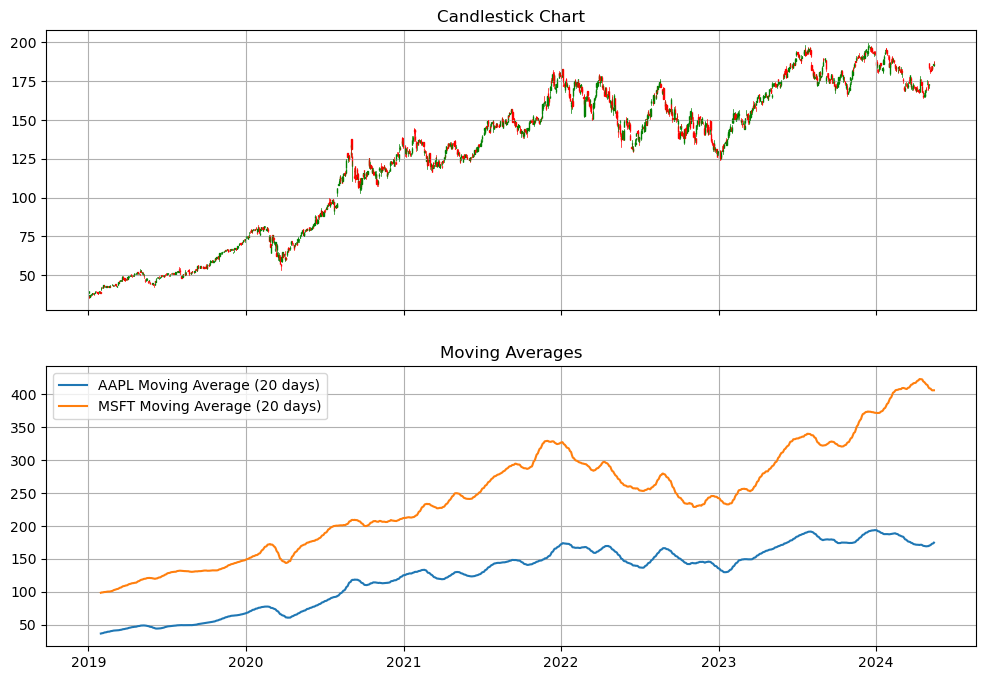

Correlation between AAPL and MSFT returns: 0.7462620608127959


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
from scipy.stats import pearsonr

# Define function to retrieve stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Define function to calculate returns
def calculate_returns(prices):
    returns = prices['Adj Close'].pct_change().dropna()
    return returns

# Define function to calculate moving averages
def calculate_moving_average(prices, window):
    return prices.rolling(window=window).mean()

# Define function to perform correlation analysis
def perform_correlation_analysis(stock1_returns, stock2_returns):
    correlation, _ = pearsonr(stock1_returns, stock2_returns)
    return correlation

# Define main function
def main():
    # Parameters
    ticker1 = 'AAPL'
    ticker2 = 'MSFT'
    start_date = '2019-01-01'
    end_date = datetime.today().strftime('%Y-%m-%d')

    # Retrieve stock data
    stock1_data = get_stock_data(ticker1, start_date, end_date)
    stock2_data = get_stock_data(ticker2, start_date, end_date)

    # Calculate returns
    stock1_returns = calculate_returns(stock1_data)
    stock2_returns = calculate_returns(stock2_data)

    # Calculate moving averages
    ma_window = 20
    stock1_ma = calculate_moving_average(stock1_data['Adj Close'], ma_window)
    stock2_ma = calculate_moving_average(stock2_data['Adj Close'], ma_window)

    # Perform correlation analysis
    correlation = perform_correlation_analysis(stock1_returns, stock2_returns)

    # Plot candlestick chart
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    ax[0].set_title('Candlestick Chart')
    ax[0].xaxis_date()
    candlestick_ohlc(ax[0], zip(mdates.date2num(stock1_data.index), stock1_data['Open'], stock1_data['High'], stock1_data['Low'], stock1_data['Close']), width=0.6, colorup='g', colordown='r')
    ax[0].grid(True)
    ax[1].plot(stock1_data.index, stock1_ma, label=f'{ticker1} Moving Average ({ma_window} days)')
    ax[1].plot(stock2_data.index, stock2_ma, label=f'{ticker2} Moving Average ({ma_window} days)')
    ax[1].set_title('Moving Averages')
    ax[1].legend()
    ax[1].grid(True)
    plt.show()

    print(f'Correlation between {ticker1} and {ticker2} returns: {correlation}')

if __name__ == "__main__":
    main()
